In [1]:
import pandas as pd
import seaborn as sns

# British Elections

The british elections data is available at [Electoral Calculus](https://www.electoralcalculus.co.uk/).
Here the data from the years 2005, 2010, 2015, 2017, 2019 and 2024 is loaded and combined into one dataframe.

Here is a quick overview about the meaning of each column:

| Column      | Description                                                                                                           |
|-------------|-----------------------------------------------------------------------------------------------------------------------|
| Name        | Full name of the constituency                                                                                         |
| MP          | The full name of the elected MP                                                                                       |
| Area        | [Codes](https://www.electoralcalculus.co.uk/area_defns_eu.html) for the area in which the constituency is located in. |
| County      | The county in which the constituency is located in.                                                                   |
| Electorate  | Number of people eligible to vote in the constituency.                                                                |
| CON         | Number of votes for the Conservative candidate.                                                                       |
| LAB         | Number of votes for the Labour candidate.                                                                             |
| LIB         | Number of votes for the Liberal Democrat candidate.                                                                   |
| Reform      | Number of votes for the Reform party candidate. (2024 exclusive)                                                      |
| Brexit/UKIP | Number of votes for the Brexit or United Kingdom Independence Party candidate. (UKIP 2010-2017, Brexit 2019)          |
| Green       | Number of votes for the Green party candidate.                                                                        |
| NAT         | Number of votes for the Nationalist candidate.                                                                        |
| MIN         | Number of votes for the Minor party candidate.                                                                        |
| OTH         | Number of votes for all other party candidates.                                                                       |
| Year        | The year of the election that the row is from.                                                                        |

In [2]:
# Load and the data
# https://www.electoralcalculus.co.uk/flatfile.html

df_election_24 = pd.read_csv('https://www.electoralcalculus.co.uk/electdata_2024.txt', encoding='latin1', sep=';')
df_election_24['Year'] = 2024

df_election_19 = pd.read_csv('https://www.electoralcalculus.co.uk/electdata_2019.txt', encoding='latin1', sep=';')
df_election_19.rename(columns={'Brexit': 'Brexit/UKIP'}, inplace=True)
df_election_19['Year'] = 2019

df_election_17 = pd.read_csv('https://www.electoralcalculus.co.uk/electdata_2017.txt', encoding='latin1', sep=';')
df_election_17.rename(columns={'UKIP': 'Brexit/UKIP'}, inplace=True)
df_election_17['Year'] = 2017

df_election_15 = pd.read_csv('https://www.electoralcalculus.co.uk/electdata_2015.txt', encoding='latin1', sep=';')
df_election_15.rename(columns={'UKIP': 'Brexit/UKIP'}, inplace=True)
df_election_15['Year'] = 2015

df_election_10 = pd.read_csv('https://www.electoralcalculus.co.uk/electdata_2010ug.txt', encoding='latin1', sep=';')
df_election_10.rename(columns={'UKIP': 'Brexit/UKIP'}, inplace=True)
df_election_10['Year'] = 2010

df_election_05 = pd.read_csv('https://www.electoralcalculus.co.uk/electdata_2005ob.txt', encoding='latin1', sep=';')
df_election_05['Year'] = 2005

df_election_total = pd.concat([
    df_election_24,
    df_election_19,
    df_election_17,
    df_election_15,
    df_election_10,
    df_election_05
])
df_election_total

,Name,MP,Area,County,Electorate,CON,LAB,LIB,Reform,Green,NAT,MIN,OTH,Year,Brexit/UKIP
0,Aldershot,Alex Baker,12,Hampshire,78569,14081,19764,4052,8210.0,2155.0,0,0,282,2024,NaN
1,Aldridge-Brownhills,Wendy Morton,7,Black Country,70867,15901,11670,1755,9903.0,1746.0,0,0,0,2024,NaN
2,Altrincham and Sale West,Connor Rand,4,Central Manchester,71739,16624,20798,4727,4961.0,3699.0,0,643,0,2024,NaN
3,Amber Valley,Linsey Farnsworth,8,Derbyshire,70480,10725,15746,1590,12192.0,2278.0,0,0,0,2024,NaN
4,Arundel and South Downs,Andrew Griffith,12,West Sussex,77969,22001,9782,9867,7391.0,5515.0,0,0,184,2024,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,Newry and Armagh,Conor Murphy,1,Armagh,72448,7025,12770,9311,NaN,NaN,20965,0,625,2005,NaN
642,Strangford,Iris Robinson,1,Down,69040,7872,2496,20921,NaN,NaN,949,3332,1462,2005,NaN
643,Tyrone West,Pat Doherty,1,Tyrone,60286,2981,3949,7742,NaN,NaN,16910,11905,0,2005,NaN
644,Ulster Mid,Martin McGuinness,1,Tyrone,62657,4853,7922,10665,NaN,NaN,21641,0,345,2005,NaN


In [3]:
# Define a dataframe for the entire UK election results for each year (sum of all constituencies)
df_election_total_uk = df_election_total.groupby('Year').sum().reset_index()
df_election_total_uk.drop(columns=['Name', 'MP', 'Area', 'County'], inplace=True)
df_election_total_uk

,Year,Electorate,CON,LAB,LIB,Reform,Green,NAT,MIN,OTH,Brexit/UKIP
0,2005,44399139,8909611,9693215,6227280,0.0,0.0,761635,270902,1285837,0.0
1,2010,45601060,10828965,8717487,7004464,0.0,284854.0,828722,272588,788218,962439.0
2,2015,46422317,11440466,9447113,2600122,0.0,1157613.0,1812372,124565,191272,3924331.0
3,2017,46842628,13749286,12973238,2664216,0.0,525435.0,1380949,163458,87668,658621.0
4,2019,47566574,14054144,10414619,3940547,0.0,865715.0,1577498,146400,236815,778372.0
5,2024,48111011,6921891,9818224,3691221,4223852.0,1943258.0,1130460,492168,571423,0.0


# Visualizing the data

Now that we have the data in a nice format, we can start visualizing it.
We will use the seaborn library for this.
The first plot will be a line plot showing the total votes for each party over the years.
Under each plot, we will give a short analysis of the data.

<Axes: xlabel='Year', ylabel='Votes'>

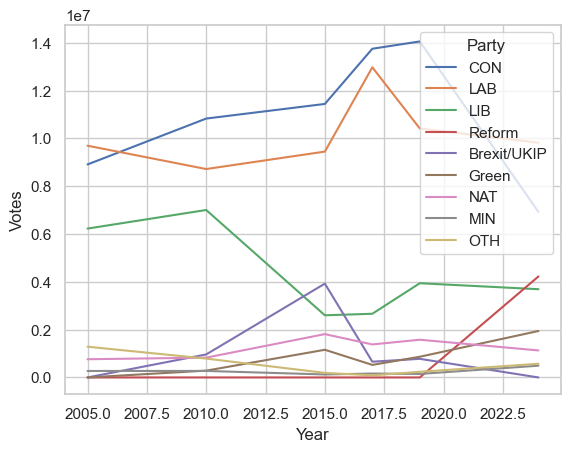

In [4]:
# noinspection SpellCheckingInspection
sns.set_theme(style='whitegrid')

# Show all parties in one and the same line-plot and show the party names in the legend
df_election_total_uk_melt = df_election_total_uk.melt(id_vars='Year', value_vars=['CON', 'LAB', 'LIB', 'Reform', 'Brexit/UKIP', 'Green', 'NAT', 'MIN', 'OTH'], var_name='Party', value_name='Votes')
sns.lineplot(data=df_election_total_uk_melt, x='Year', y='Votes', hue='Party')

We see that the Conservative party has the most votes in nearly every election, followed by the Labour party.

We also see that the Liberal Democrats had a peak in 2010, but have been declining since then.

The Brexit/UKIP party has been growing in votes since 2005, but has been declining since 2015 and does not exist in 2024.

Reform is a new party in 2024 and has a decent number of votes, nearly surpassing the Conservative party with their 2024 result.

# Trends for each party

Now we take a look at the trends for each party.
We will compare the vote-share of each party to their last vote-share (in percent).
This way we can see if a party is gaining or losing votes over the years.

## Conservative

<Axes: xlabel='Year', ylabel='CON_ratio'>

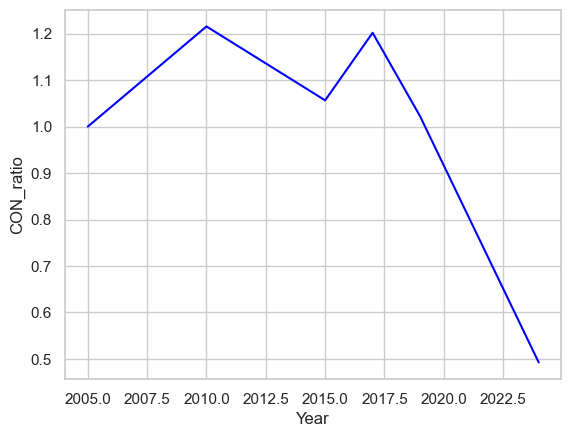

In [5]:
# Show the trend for the Conservative partys vote-share compared to their last share over the years

df_election_total_uk['CON_ratio'] = df_election_total_uk['CON'] / df_election_total_uk['CON'].shift(1)
df_election_total_uk.loc[0, 'CON_ratio'] = 1.0
sns.lineplot(data=df_election_total_uk, x='Year', y='CON_ratio', color='blue')

We see that the Conservative party has been gaining votes over the years until 2019.
In 2024, they had a great loss of votes compared to 2019.

## Labour

<Axes: xlabel='Year', ylabel='LAB_ratio'>

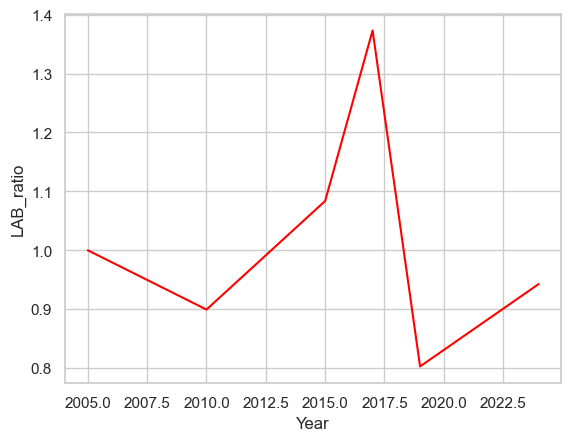

In [6]:
# Show the trend for the Labour partys vote-share compared to their last share over the years

df_election_total_uk['LAB_ratio'] = df_election_total_uk['LAB'] / df_election_total_uk['LAB'].shift(1)
df_election_total_uk.loc[0, 'LAB_ratio'] = 1.0
sns.lineplot(data=df_election_total_uk, x='Year', y='LAB_ratio', color='red')

The Labour party had an extreme peak in 2017, but has been declining since then.

## Liberal Democrats

<Axes: xlabel='Year', ylabel='LIB_ratio'>

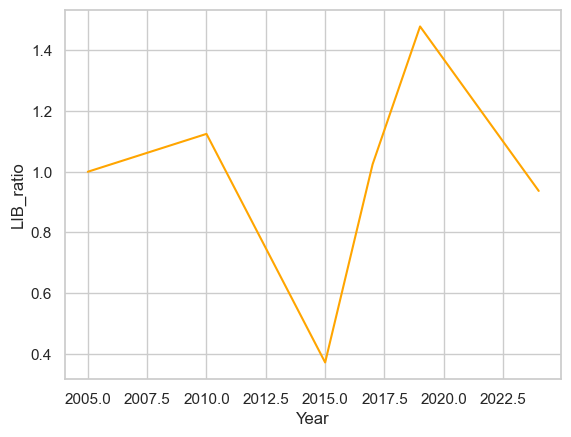

In [7]:
# Show the trend for the Liberal Democrats' vote-share compared to their last share over the years

df_election_total_uk['LIB_ratio'] = df_election_total_uk['LIB'] / df_election_total_uk['LIB'].shift(1)
df_election_total_uk.loc[0, 'LIB_ratio'] = 1.0
sns.lineplot(data=df_election_total_uk, x='Year', y='LIB_ratio', color='orange')

The Liberal Democrats had an impressive low in 2015, which they somewhat recovered from in 2019.
In 2024, they had a slight loss of votes compared to 2019.

## Reform

The Reform party only exists in 2024, so we cannot compare their vote-share to previous years.

## Brexit/UKIP

<Axes: xlabel='Year', ylabel='Brexit/UKIP_ratio'>

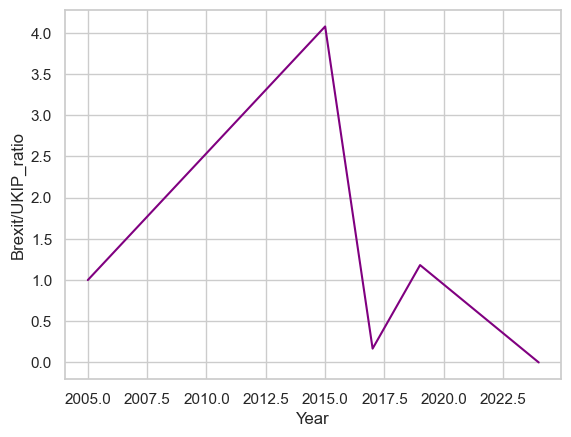

In [8]:
# Show the trend for the Brexit/UKIP vote-share compared to their last share over the years

df_election_total_uk['Brexit/UKIP_ratio'] = df_election_total_uk['Brexit/UKIP'] / df_election_total_uk['Brexit/UKIP'].shift(1)
df_election_total_uk.loc[0, 'Brexit/UKIP_ratio'] = 1.0
sns.lineplot(data=df_election_total_uk, x='Year', y='Brexit/UKIP_ratio', color='purple')

The Brexit or UKIP party has had their most growth in 2015, had a slight decline in 2017 and remained stable in 2019.
The movement does not exist in 2024, as they already archived their goal.

## Nationalist

<Axes: xlabel='Year', ylabel='NAT_ratio'>

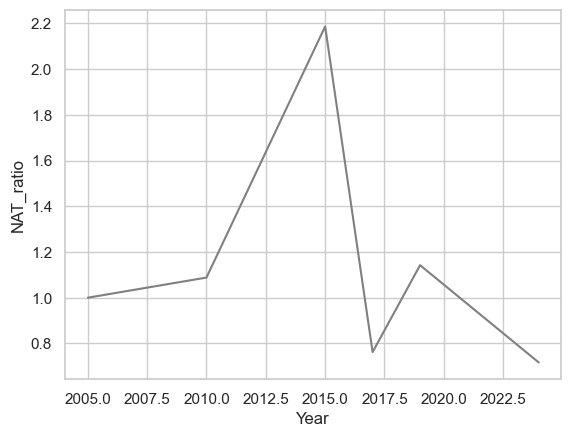

In [9]:
# Show the trend for the Nationalist vote-share compared to their last share over the years

df_election_total_uk['NAT_ratio'] = df_election_total_uk['NAT'] / df_election_total_uk['NAT'].shift(1)
df_election_total_uk.loc[0, 'NAT_ratio'] = 1.0
sns.lineplot(data=df_election_total_uk, x='Year', y='NAT_ratio', color='gray')

The Nationalist party has been gaining votes over the years, with a peek of growth in 2015 and slight decline ever since.

## Green

<Axes: xlabel='Year', ylabel='Green_ratio'>

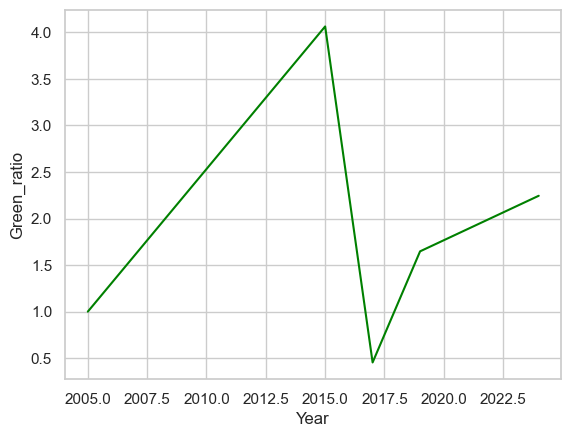

In [10]:
# Show the trend for the Green vote-share compared to their last share over the years

df_election_total_uk['Green_ratio'] = df_election_total_uk['Green'] / df_election_total_uk['Green'].shift(1)
df_election_total_uk.loc[0, 'Green_ratio'] = 1.0
sns.lineplot(data=df_election_total_uk, x='Year', y='Green_ratio', color='green')

The Green party had their most growth in 2015.
Their vote-share shrunk in 2017, but has been growing since then.

## Minor

<Axes: xlabel='Year', ylabel='MIN_ratio'>

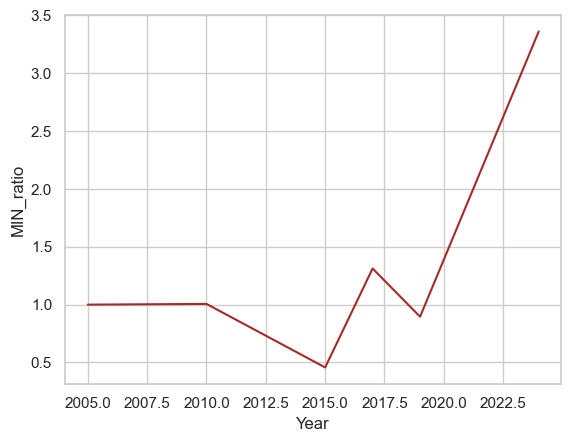

In [11]:
# Show the trend for the Minor vote-share compared to their last share over the years

df_election_total_uk['MIN_ratio'] = df_election_total_uk['MIN'] / df_election_total_uk['MIN'].shift(1)
df_election_total_uk.loc[0, 'MIN_ratio'] = 1.0
sns.lineplot(data=df_election_total_uk, x='Year', y='MIN_ratio', color='brown')

The Minor party candidates have had a relatively stable vote-share over the years.
In 2024, they experienced immense growth compared to 2019.

## Other

<Axes: xlabel='Year', ylabel='OTH_ratio'>

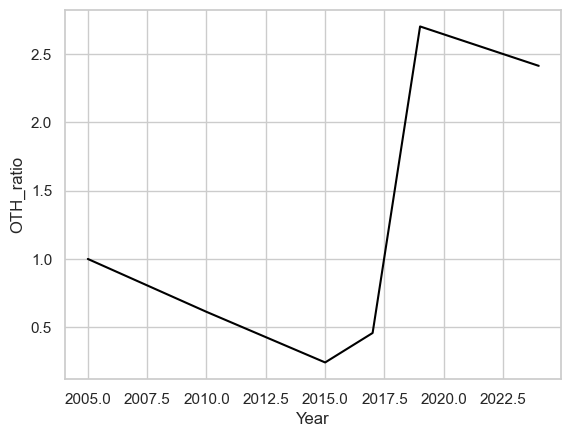

In [12]:
# Show the trend for the Other vote-share compared to their last share over the years

df_election_total_uk['OTH_ratio'] = df_election_total_uk['OTH'] / df_election_total_uk['OTH'].shift(1)
df_election_total_uk.loc[0, 'OTH_ratio'] = 1.0
sns.lineplot(data=df_election_total_uk, x='Year', y='OTH_ratio', color='black')

The votes received by all other parties peeked with their growth in 2019 and continued to grow in 2024.
That development alludes to a growing diversity in the political landscape in the UK.

# Area analysis

Now we will take a look at the area data.
We will group the data by area and sum up the votes for each party.
Then we will visualize the data for each area.
Lastly, we will give a short analysis of the data for each area.

In [13]:
# Group the data by area and sum up the votes for each party

df_election_total_area = df_election_total.groupby(['Year', 'Area']).sum().reset_index()
df_election_total_area.drop(columns=['Name', 'MP', 'County'], inplace=True)
df_election_total_area

,Year,Area,Electorate,CON,LAB,LIB,Reform,Green,NAT,MIN,OTH,Brexit/UKIP
0,2005,1,1148479,127414,125626,241856,0.0,0.0,174530,42277,5899,0.0
1,2005,2,3852705,369388,922402,528076,0.0,0.0,412267,10201,91553,0.0
2,2005,3,1918780,214389,580453,256295,0.0,0.0,0,6631,40408,0.0
3,2005,4,5150851,845196,1327669,629250,0.0,0.0,0,14561,128314,0.0
4,2005,5,3737035,640553,958006,454705,0.0,0.0,0,15384,130584,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
67,2024,8,3501975,626568,753723,136929,403530.0,133447.0,0,38905,40619,0.0
68,2024,9,4550243,869448,834896,375642,496237.0,195669.0,0,26702,40730,0.0
69,2024,10,4284750,785672,682081,687659,384240.0,206780.0,0,2050,37687,0.0
70,2024,11,5662486,683468,1429461,366670,289070.0,334252.0,0,154299,69707,0.0


In [14]:
df_election_total_area_melt = df_election_total_area.melt(id_vars=['Year', 'Area'], value_vars=['CON', 'LAB', 'LIB', 'Reform', 'Brexit/UKIP', 'Green', 'NAT', 'MIN', 'OTH'], var_name='Party', value_name='Votes')

## Northern Ireland (Code 1)

<Axes: xlabel='Year', ylabel='Votes'>

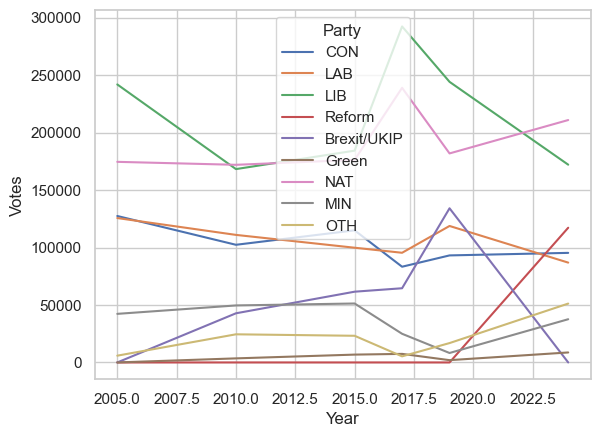

In [15]:
sns.lineplot(data=df_election_total_area_melt[df_election_total_area_melt['Area'] == 1], x='Year', y='Votes', hue='Party')

In Northern Ireland, the Liberal Democrats and the Nationalist party have the most votes in every election.
In 2024, the Reform party had a great start and became the third most voted party in Northern Ireland.
Furthermore, the Nationalist party has gotten the most votes in 2024.

## Scotland (Code 2)

<Axes: xlabel='Year', ylabel='Votes'>

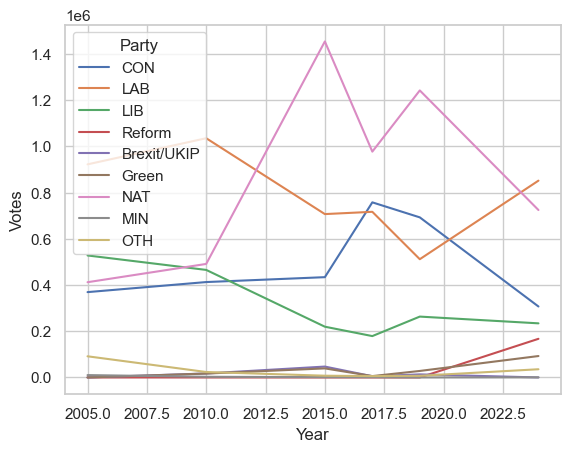

In [16]:
sns.lineplot(data=df_election_total_area_melt[df_election_total_area_melt['Area'] == 2], x='Year', y='Votes', hue='Party')

In Scotland, the Nationalist party has the most votes in every election, except for 2024 where Labour had the most votes.
The Conservative party has seen a decline in votes since 2017 and as of 2019 has been declining at the same rate as the Nationalist party.

## North-East (Code 3)

<Axes: xlabel='Year', ylabel='Votes'>

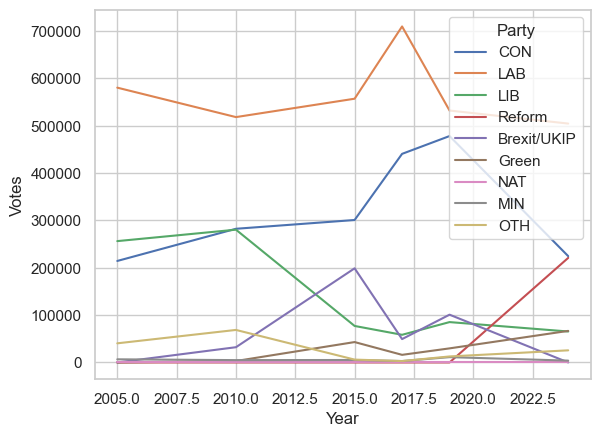

In [17]:
sns.lineplot(data=df_election_total_area_melt[df_election_total_area_melt['Area'] == 3], x='Year', y='Votes', hue='Party')

In the North-East, the Labour party has the most votes in every election.
The Conservative party has lost a great number of voters to the Reform party in 2024.

## North-West (Code 4)

<Axes: xlabel='Year', ylabel='Votes'>

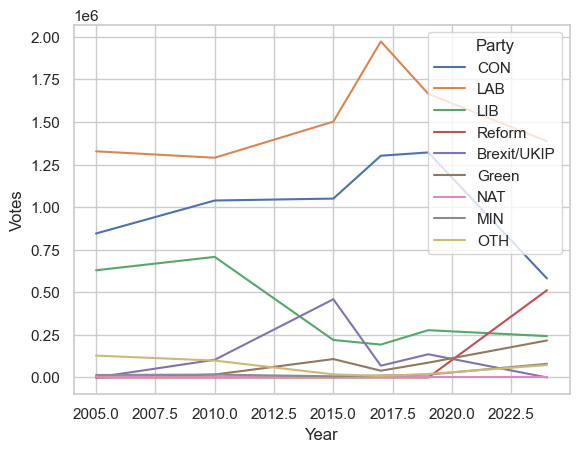

In [18]:
sns.lineplot(data=df_election_total_area_melt[df_election_total_area_melt['Area'] == 4], x='Year', y='Votes', hue='Party')

In the North-West, the Labour party has the most votes in every election.
The Labour party as well as the Conservative party have lost a great number of voters to the Reform party in 2024.

## Yorks / Humber (Code 5)

<Axes: xlabel='Year', ylabel='Votes'>

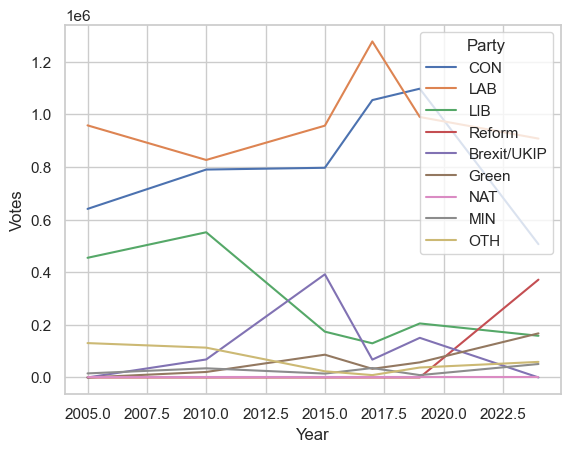

In [19]:
sns.lineplot(data=df_election_total_area_melt[df_election_total_area_melt['Area'] == 5], x='Year', y='Votes', hue='Party')

Yorks / Humber was a contested area until 2024.
For the longest time, there was a contest between the Labour and Conservative party.
In 2024, the Reform party has taken a great number of votes from both parties, with the Conservative party being the most affected.
As a result, the Reform party has the third most votes in 2024 and is close to surpassing the Conservative party.

## Wales (Code 6)

<Axes: xlabel='Year', ylabel='Votes'>

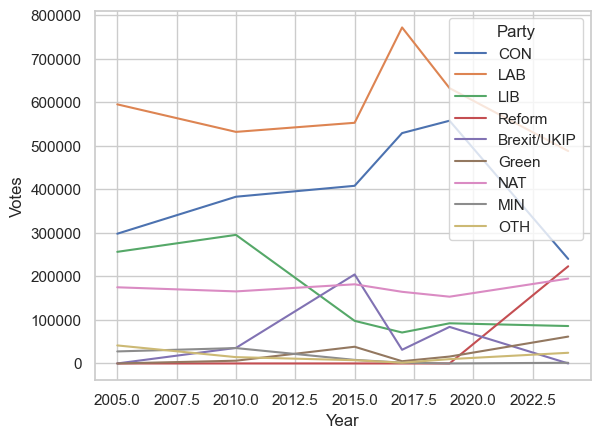

In [20]:
sns.lineplot(data=df_election_total_area_melt[df_election_total_area_melt['Area'] == 6], x='Year', y='Votes', hue='Party')

Wales is a stronghold for the Labour party.
The closest competitor is the Conservative party, but they have been losing votes to the Reform party in 2024.
Labour has also lost votes to the Reform party in 2024, but not as many as the Conservative party.

## West Midlands (Code 7)

<Axes: xlabel='Year', ylabel='Votes'>

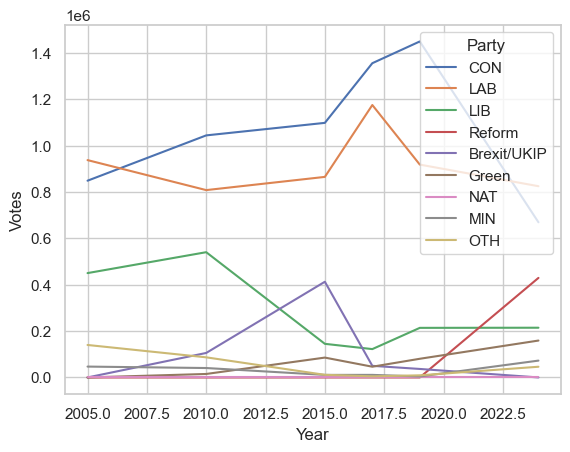

In [21]:
sns.lineplot(data=df_election_total_area_melt[df_election_total_area_melt['Area'] == 7], x='Year', y='Votes', hue='Party')

The West Midlands have been a stronghold for the Conservative party until 2024.
In 2024, Labour has surpassed the Conservative party in votes because the Conservative party has lost a great number of votes to the Reform party.
The Reform party has the third most votes in 2024 and is close to surpassing the Conservative party.

## East Midlands (Code 8)

<Axes: xlabel='Year', ylabel='Votes'>

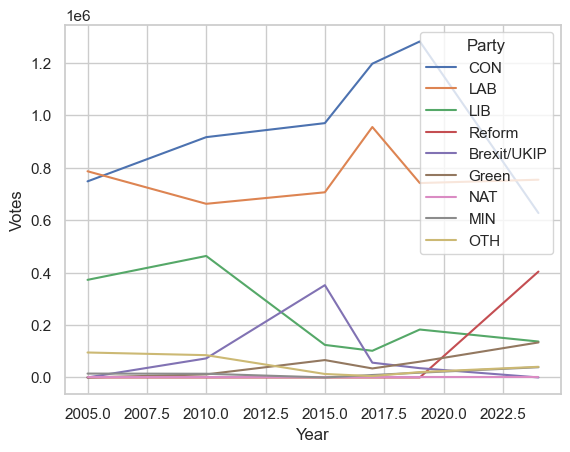

In [22]:
sns.lineplot(data=df_election_total_area_melt[df_election_total_area_melt['Area'] == 8], x='Year', y='Votes', hue='Party')

The East Midlands have been a stronghold for the Conservative party until 2024.
In 2024, Labour has surpassed the Conservative party in votes because the Conservative party has lost a great number of votes to the Reform party.
Labour has kept a steady number of votes in 2024 and has not lost any to the Reform party.
The Reform party has the third most votes in 2024 and is close to both the Conservative party and the Labour party.

## Anglia (Code 9)

<Axes: xlabel='Year', ylabel='Votes'>

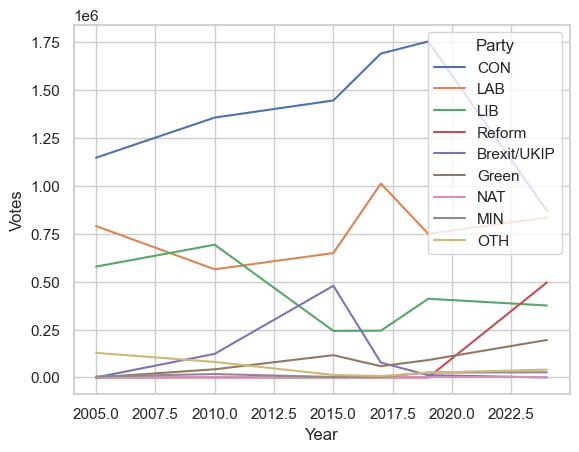

In [23]:
sns.lineplot(data=df_election_total_area_melt[df_election_total_area_melt['Area'] == 9], x='Year', y='Votes', hue='Party')

Anglia has been an immense stronghold for the Conservative party until 2024.
In 2024, Labour has nearly surpassed the Conservative party in votes because the Conservative party has lost a great number of votes to the Reform party.
The Reform party has the third most votes in 2024.

## South-West (Code 10)

<Axes: xlabel='Year', ylabel='Votes'>

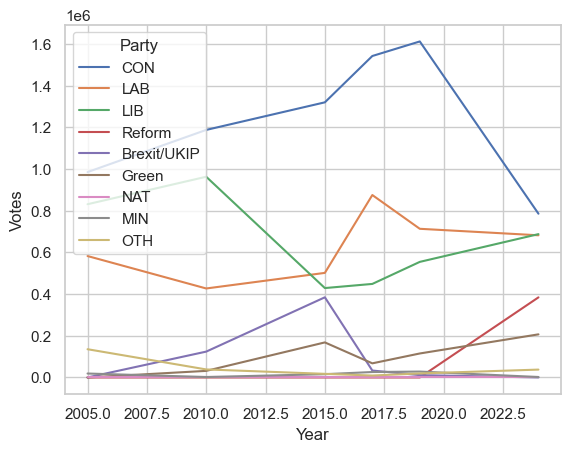

In [24]:
sns.lineplot(data=df_election_total_area_melt[df_election_total_area_melt['Area'] == 10], x='Year', y='Votes', hue='Party')

The South-West has been a stronghold for the Conservative party until 2024.
In 2024, the Conservative party has lost a great number of votes to the Reform party, but still has the most votes.
The Labour party and the Liberal Democrats have around the same number of votes in 2024 and are close to surpassing the Conservative party.

## London (Code 11)

<Axes: xlabel='Year', ylabel='Votes'>

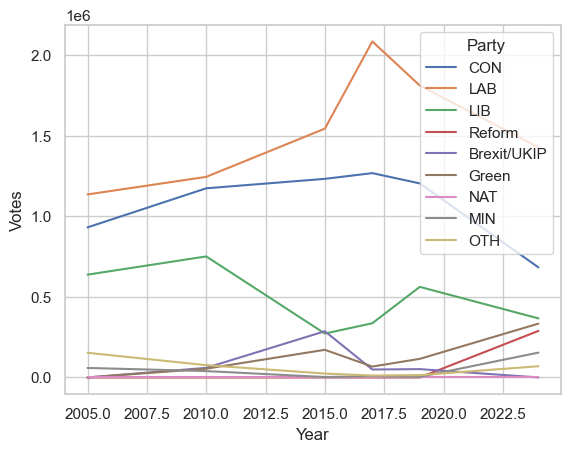

In [25]:
sns.lineplot(data=df_election_total_area_melt[df_election_total_area_melt['Area'] == 11], x='Year', y='Votes', hue='Party')

The capital of the UK is a stronghold for the Labour party.
The Conservative party has lost a great number of votes to different parties in 2024.
The Labour party has about the same decline as the Conservative party, but still has the most votes in 2024 with a great margin.
The Reform party has around the same number of votes as the Liberal Democrats and the Green party.

## South-East (Code 12)

<Axes: xlabel='Year', ylabel='Votes'>

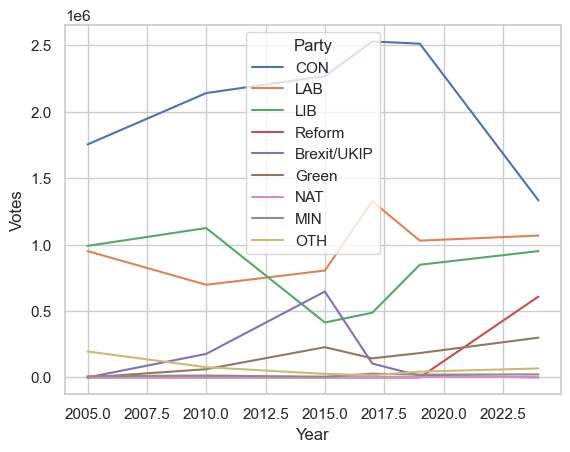

In [26]:
sns.lineplot(data=df_election_total_area_melt[df_election_total_area_melt['Area'] == 12], x='Year', y='Votes', hue='Party')

Lastly, the South-East, which has been a stronghold for the Conservative party until 2024.
In 2024, the Conservative party has lost a great number of votes to the Reform party, but still has the most votes, by a small margin.
The Labour party and the Liberal Democrats have slightly increased their votes in 2024 and are close to surpassing the Conservative party.
The Reform party has the fourth most votes in 2024.

# Conclusion

The Conservative party has been the most voted party in nearly every election, but has been surpassed by the Labour party in 2024.

A new party, the Reform party, has been stealing votes from several parties, especially the Conservative party, and has established itself as an alternative to the Conservative party.

The Labour party, having had their peek in 2017, has been slowly declining, but has surpassed the Conservative party in 2024.

It is also visible that the political landscape in the UK is becoming more diverse, with more parties gaining votes over the years.

Furthermore, the area analysis has shown that the UK is divided into several strongholds for different parties, with the Conservative party being the most voted party in most areas inside England.

The vote-shift between 2019 and 2024 is also greater than in previous years, which indicates a change in the political landscape in the UK.